In [1]:
import warnings
from IPython.display import HTML, display

def print_colored(text, color):
    display(HTML(f"<text style='color: {color};'>{text}</text>"))

def custom_warn(message, category, filename, lineno, file=None, line=None):
    str_warn = f'[{category.__name__}] {filename}:{lineno} --> {message}'
    print(str_warn, flush=True)
    #print_colored(str_warn, 'red')

warnings.showwarning = custom_warn


### Porting to Google Colab
The following cell enables this notebook to run from Google Colab as well as from your local machine IDE.<br>
You can change `root_directory` and/or `this_notebook_google_path` to point to the directory in your Google account, which contains this notebook, together with the `imgs` sub-directory and the rest of the files.<br>

In [2]:
import sys
import os
try:
    from google.colab import drive as google_drive
except:
    # no Google Colab --> fall back to local machine
    google_drive = None

if google_drive is not None:
    google_drive_directory = os.path.join('/','content','gdrive')
    google_drive.mount(google_drive_directory)
    all_projects_path = os.path.join(google_drive_directory, 'Othercomputers','My Laptop', 'projects')
else:
    all_projects_path = os.path.join('d:\\', 'projects')

project_path = os.path.join(all_projects_path,'BioTAU','Huntington')
assert os.path.exists(project_path), f'Project path {project_path} not found!'
# enable import python files from this notebook's path
sys.path.append(project_path)
# enable reading images and data files from this notebook's path
os.chdir(project_path)

datasets_path = os.path.join(project_path, 'datasets')
assert os.path.exists(datasets_path), f'Datasets path {datasets_path} not found!'

output_path = os.path.join(project_path, 'output')
os.makedirs(output_path, exist_ok=True)
assert os.path.exists(output_path), f'Output path {output_path} not found!'

print(f'Current working directory: {os.getcwd()}')
print(f'Datasets path: {datasets_path}')
print(f'Output path: {output_path}')

Current working directory: d:\projects\BioTAU\Huntington
Datasets path: d:\projects\BioTAU\Huntington\datasets
Output path: d:\projects\BioTAU\Huntington\output


# Live Data

In [3]:
from python.Live_Cell_Imaging import Live_Cell_Imaging
file_name_live_data = os.path.join(datasets_path,'Live_Cell_Imaging.csv')
live_data = Live_Cell_Imaging(file_name_live_data, verbose=0, class_print_read_data=True)

Reading Live_Cell_Imaging from file_name='d:\\projects\\BioTAU\\Huntington\\datasets\\Live_Cell_Imaging.csv'
[UserWarning] d:\projects\BioTAU\Huntington\python\csv_pd.py:139 --> For file: "d:\projects\BioTAU\Huntington\datasets\Live_Cell_Imaging.csv" There are 3 duplicate columns to be removed:
['Cell Type', 'Severity', 'PC']
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:159 --> Patients_Catalog: match id='143' --> id_2_check='143' --> catalog_id=HGADFN0143  Zero age!
['GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'HGADFN0143', 'HGADFN0143', 'HGADFN0143', 'HGADFN0143', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'NA0848', 'NA0848', 'NA0848', 'NA0848', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04717', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285', 'GM04285'

# Mitochondrial Data

In [4]:
from python.Mitochondrial_Data import All_Mitochondrial_Data
file_name_mitochondrial_data = os.path.join(datasets_path, 'Mitochondrial', 'HD Mitochondrial Morphology Analysis Dataset (Before normalization).csv')
file_name_drp1_df5 = os.path.join(datasets_path, 'Mitochondrial', 'drp1_df5.csv')
file_name_mfn1_df5 = os.path.join(datasets_path, 'Mitochondrial', 'mfn1_df5.csv')
file_name_mfn2_df5 = os.path.join(datasets_path, 'Mitochondrial', 'mfn2_df5.csv')
file_name_vat1_df5 = os.path.join(datasets_path, 'Mitochondrial', 'vat1_df5.csv')
all_mitochondrial_data = All_Mitochondrial_Data(file_name_mitochondrial_data, [file_name_vat1_df5,file_name_drp1_df5,file_name_mfn2_df5,file_name_mfn1_df5], verbose=0, class_print_read_data=True)



Reading Mitochondrial Morphology data: d:\projects\BioTAU\Huntington\datasets\Mitochondrial\HD Mitochondrial Morphology Analysis Dataset (Before normalization).csv
[UserWarning] d:\projects\BioTAU\Huntington\python\csv_pd.py:139 --> There are 2 duplicate columns to be removed:
['group_with_id', 'group_with_pc']
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:56 --> Found typo!! base_id=NA0663 --> selected_id='NA0633' --> ret_id='NA0633'
Reading Mitochondrial protein data: vat1_df5
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:159 --> Patients_Catalog: match id='143' --> id_2_check='143' --> catalog_id=HGADFN0143  Zero age!
Reading Mitochondrial protein data: drp1_df5
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:159 --> Patients_Catalog: match id='143' --> id_2_check='143' --> catalog_id=HGADFN0143  Zero age!
Reading Mitochondrial protein data: mfn2_df5
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_C

# Cell Migration Data

In [5]:
from python.Migration_Data import Migration_Data, HGPS_Plate_Results, HGPS_Data_APRW, LatB_LowHigh_MitoQ_APRW
file_name_DataFileLatB = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'Migration', 'DataFileLatB.csv')
file_name_DataFileMitoQ = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'Migration', 'DataFileMitoQ.csv')
file_name_DataFileWithHGPS = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'Migration', 'DataFileWithHGPS.csv')
DataFileLatB = Migration_Data(file_name_DataFileLatB, verbose=0, class_print_read_data=True)
DataFileMitoQ = Migration_Data(file_name_DataFileMitoQ, verbose=0, class_print_read_data=True)
DataFileWithHGPS = Migration_Data(file_name_DataFileWithHGPS, verbose=0, class_print_read_data=True)
file_name_HGPS_PlateResults = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'HGPS_PlateResults.csv')
file_name_HGPS_PlateResults_5 = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'PlateResults - LaminB+a actinin- exp5 plate1 08.01.23__2023-01-12T15_50_14-Measurement 1.csv')
file_name_HGPS_PlateResults_6 = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'PlateResults - LaminB+a actinin- exp6  05.02.23__2023-02-19T12_14_21-Measurement 1.csv')
file_name_HGPS_PlateResults_7 = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'PlateResults - LaminB+a actinin- exp7 06.02.23__2023-02-19T14_31_42-Measurement 1.csv')
file_name_HGPS_PlateResults_8 = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'PlateResults - LaminB+a actinin- exp8 12.02.23__2023-02-20T14_52_23-Measurement 1.csv')
file_name_HGPS_PlateResults_4R = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'PlateResults - LaminB+a actinin- R exp4 05.07.22__2022-07-17T09_42_44-Measurement 1.csv')
file_name_HGPS_PlateResults_4Sa = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'PlateResults - LaminB+a actinin- S exp4 05.07.22 (9-10)__2022-07-12T11_44_17-Measurement 1.csv')
file_name_HGPS_PlateResults_4Sb = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data_Excels', 'LaminB', 'PlateResults - LaminB+a actinin- S exp4 05.07.22__2022-07-12T10_09_44-Measurement 1.csv')
HGPS_Results = HGPS_Plate_Results(file_name=file_name_HGPS_PlateResults, verbose=0, class_print_read_data=True)
HGPS_PlateResults_5 = HGPS_Plate_Results(file_name_HGPS_PlateResults_5, verbose=0, class_print_read_data=True)
HGPS_PlateResults_6 = HGPS_Plate_Results(file_name_HGPS_PlateResults_6, verbose=0, class_print_read_data=True)
HGPS_PlateResults_7 = HGPS_Plate_Results(file_name_HGPS_PlateResults_7, verbose=0, class_print_read_data=True)
HGPS_PlateResults_8 = HGPS_Plate_Results(file_name_HGPS_PlateResults_8, verbose=0, class_print_read_data=True)
HGPS_PlateResults_4R = HGPS_Plate_Results(file_name_HGPS_PlateResults_4R, verbose=0, class_print_read_data=True)
HGPS_PlateResults_4Sa = HGPS_Plate_Results(file_name_HGPS_PlateResults_4Sa, verbose=0, class_print_read_data=True)
HGPS_PlateResults_4Sb = HGPS_Plate_Results(file_name_HGPS_PlateResults_4Sb, verbose=0, class_print_read_data=True)
file_name_HGPS_Data_APRW_Model = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data', 'HGPS_Data', 'APRW Model Features Wells Created.csv')
HGPS_data_APRW = HGPS_Data_APRW(file_name=file_name_HGPS_Data_APRW_Model,verbose=0, class_print_read_data=True)
file_name_LatB_LowHigh_APRW_Model = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data', 'LatB_LowHigh', 'APRW Model Features.csv')
file_name_MitoQ_APRW_Model = os.path.join(datasets_path, 'Cell_Migration', 'Migration_Data', 'MitoQ_Media_DMSO_Cleaned_75', 'APRW Model Features.csv')
LatB_LowHigh_APRW_data = LatB_LowHigh_MitoQ_APRW(file_name=file_name_LatB_LowHigh_APRW_Model,verbose=0, class_print_read_data=True)
MitoQ_APRW_data = LatB_LowHigh_MitoQ_APRW(file_name=file_name_MitoQ_APRW_Model,verbose=0, class_print_read_data=True)

Reading Migration_Data: d:\projects\BioTAU\Huntington\datasets\Cell_Migration\Migration_Data_Excels\Migration\DataFileLatB.csv
Reading Migration_Data: d:\projects\BioTAU\Huntington\datasets\Cell_Migration\Migration_Data_Excels\Migration\DataFileMitoQ.csv
Reading Migration_Data: d:\projects\BioTAU\Huntington\datasets\Cell_Migration\Migration_Data_Excels\Migration\DataFileWithHGPS.csv
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:56 --> Found typo!! base_id=NA0165017 --> selected_id='GM0165017' --> ret_id='GM01650'
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:56 --> Found typo!! base_id=NA0165320 --> selected_id='GM0165320' --> ret_id='GM01653'
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:56 --> Found typo!! base_id=NA4614610 --> selected_id='AG1614610' --> ret_id='AG16146'
[UserWarning] d:\projects\BioTAU\Huntington\python\Patients_Catalog.py:117 --> Patients_Catalog: match original_ID='NAIC016' --> id='CM16' -

# Collect all data

In [6]:
from python.patients_wells import Patient_Wells_Collecter

wells_collector = Patient_Wells_Collecter()
wells_collector.add_experiment('Live_Cell_Imaging', live_data.patients_wells_counts)
wells_collector.add_experiment('Mito', all_mitochondrial_data.wells_collecter.data)
wells_collector.add_experiment('Cell_Migration_DataFileLatB', DataFileLatB.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_DataFileMitoQ', DataFileMitoQ.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_DataFileWithHGPS', DataFileWithHGPS.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS',HGPS_Results.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS_PlateResults_5',HGPS_PlateResults_5.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS_PlateResults_6',HGPS_PlateResults_6.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS_PlateResults_7',HGPS_PlateResults_7.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS_PlateResults_8',HGPS_PlateResults_8.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS_PlateResults_4R',HGPS_PlateResults_4R.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS_PlateResults_4Sa',HGPS_PlateResults_4Sa.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LaminB_HGPS_PlateResults_4Sb',HGPS_PlateResults_4Sb.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_HGPS_Data_APRW',HGPS_data_APRW.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_LatB_LowHigh_APRW',LatB_LowHigh_APRW_data.patients_wells_count)
wells_collector.add_experiment('Cell_Migration_MitoQ_APRW',MitoQ_APRW_data.patients_wells_count)



In [7]:

wells_collector.display_table()

,Disease_Status,Age,Gender,CAG_Repeats,CAP_Score,Count_Experiments,Live_Cell_Imaging,Mito morphology,Mito vat1_df5,Mito drp1_df5,...,Cell_Migration_LaminB_HGPS_PlateResults_5,Cell_Migration_LaminB_HGPS_PlateResults_6,Cell_Migration_LaminB_HGPS_PlateResults_7,Cell_Migration_LaminB_HGPS_PlateResults_8,Cell_Migration_LaminB_HGPS_PlateResults_4R,Cell_Migration_LaminB_HGPS_PlateResults_4Sa,Cell_Migration_LaminB_HGPS_PlateResults_4Sb,Cell_Migration_HGPS_Data_APRW,Cell_Migration_LatB_LowHigh_APRW,Cell_Migration_MitoQ_APRW
Patient_ID,,,,,,,,,,,,,,,,,,,,,
AG0015,HC,1.50,M,NA,NaN,14,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,4,NA
AG16146,HC,31.00,M,NA,NaN,13,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,6,NA,NA
GM00305,HD_Severe,56.00,F,45,129.43,22,28,15,6,6,...,NA,5,NA,NA,6,NA,NA,12,NA,2
GM00726,HC,26.00,F,NA,NaN,11,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
GM01650,HC,37.00,F,NA,NaN,22,NA,44,14,12,...,6,5,6,NA,NA,NA,3,3,NA,NA
GM01653,HC,37.00,M,NA,NaN,25,NA,24,23,23,...,6,5,6,NA,6,NA,3,9,NA,8
GM02147,HD_Severe,55.00,M,44,118.64,13,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,1,NA,NA
GM02165,HD_Severe,57.00,M,46,140.52,22,NA,9,3,4,...,NA,NA,NA,12,6,NA,NA,11,NA,2
GM04196,HD_Mild,51.00,F,44,110.02,16,NA,NA,NA,NA,...,NA,NA,NA,12,NA,NA,NA,1,NA,2


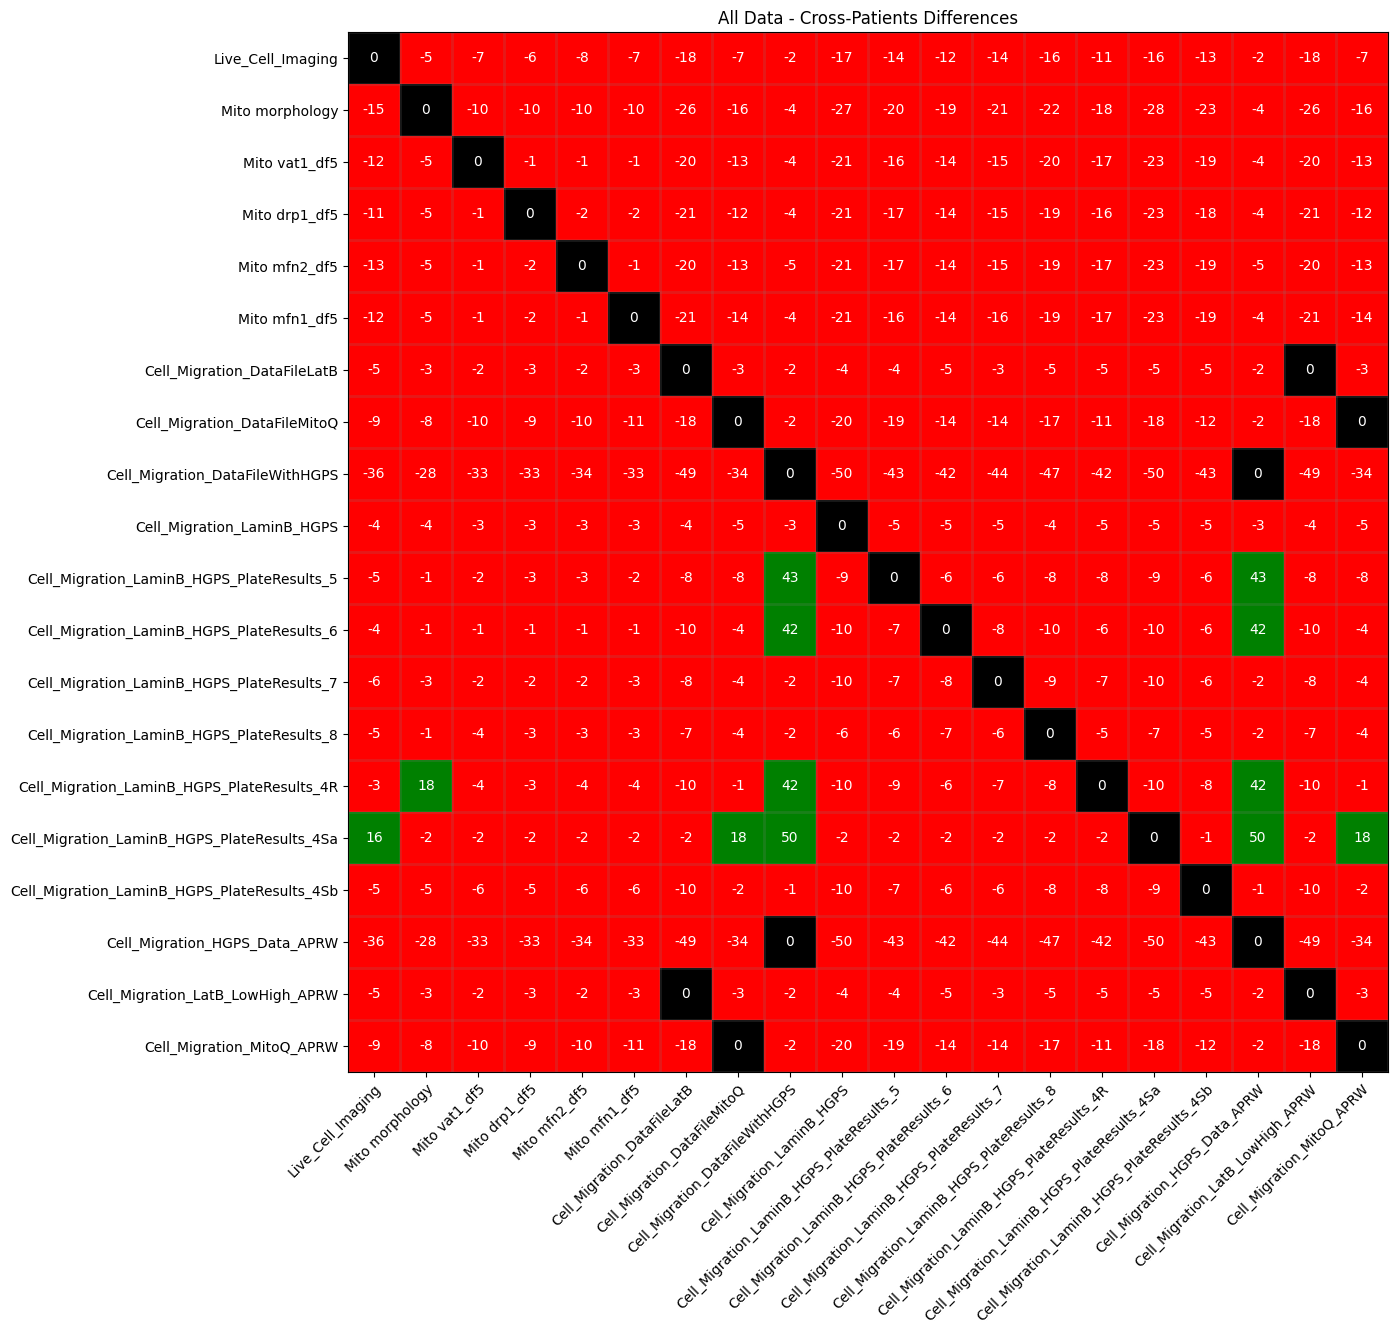

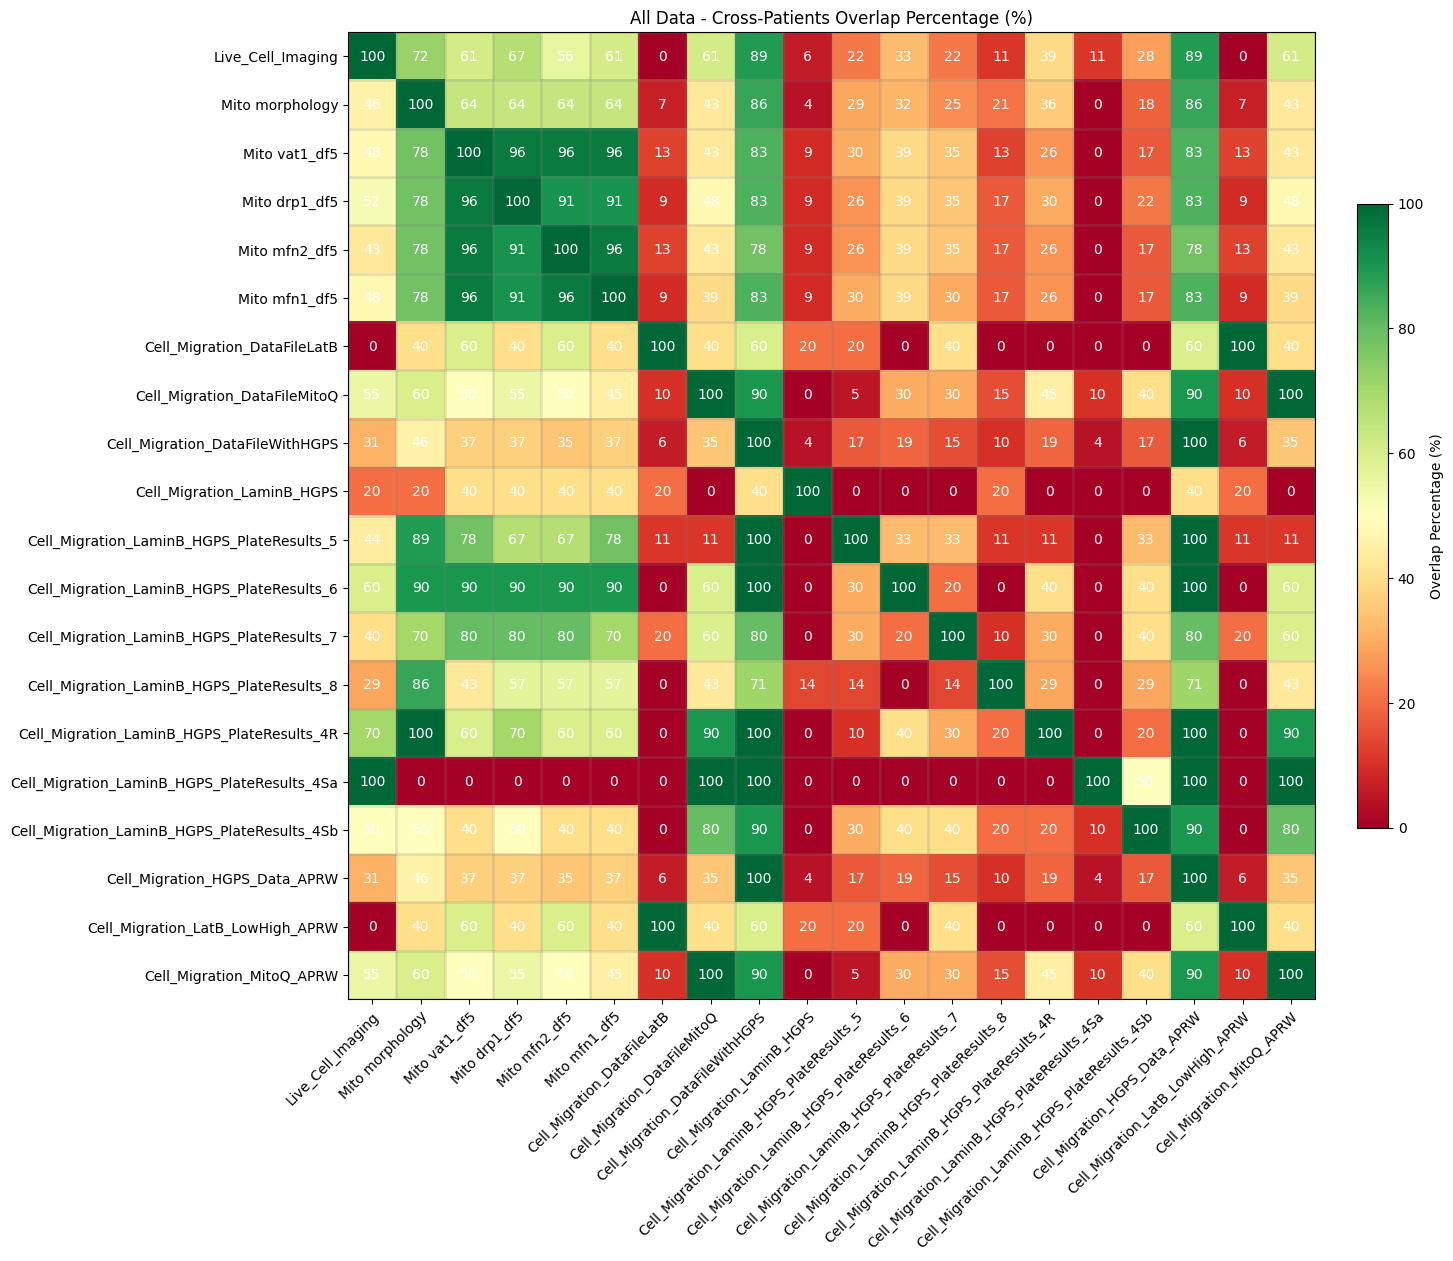

In [8]:
wells_collector.display_cross_patients_all()

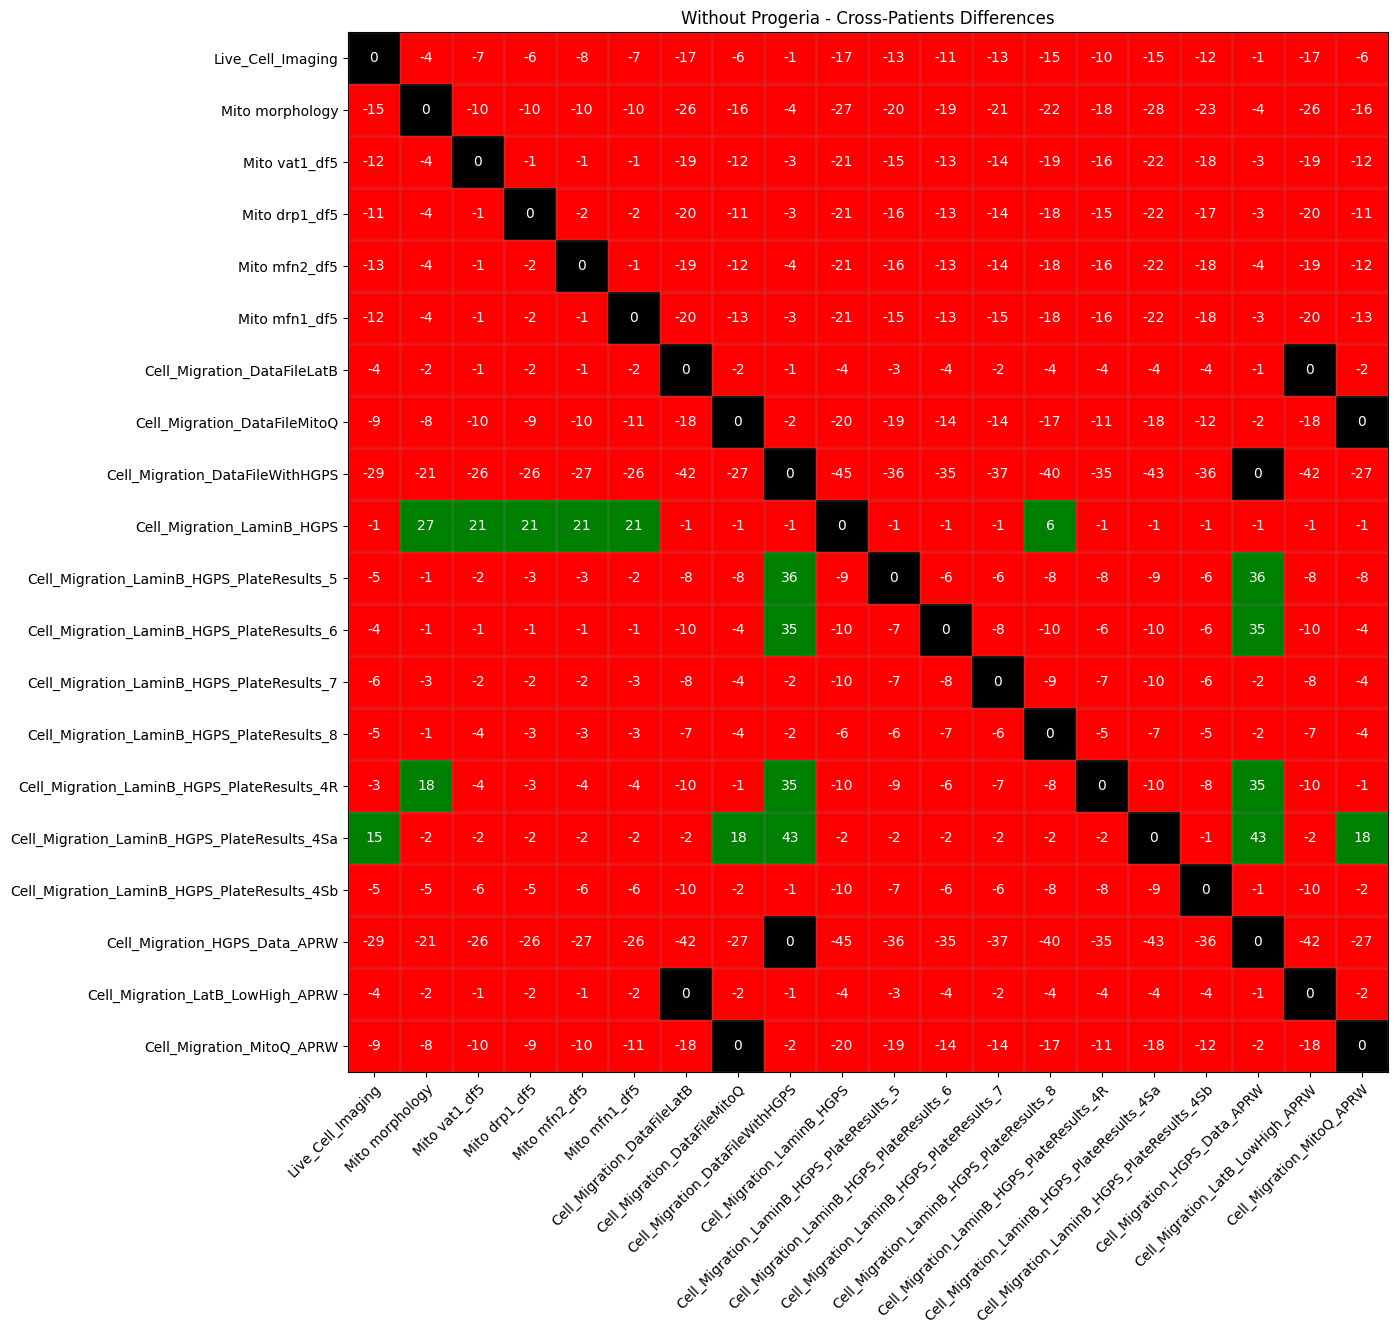

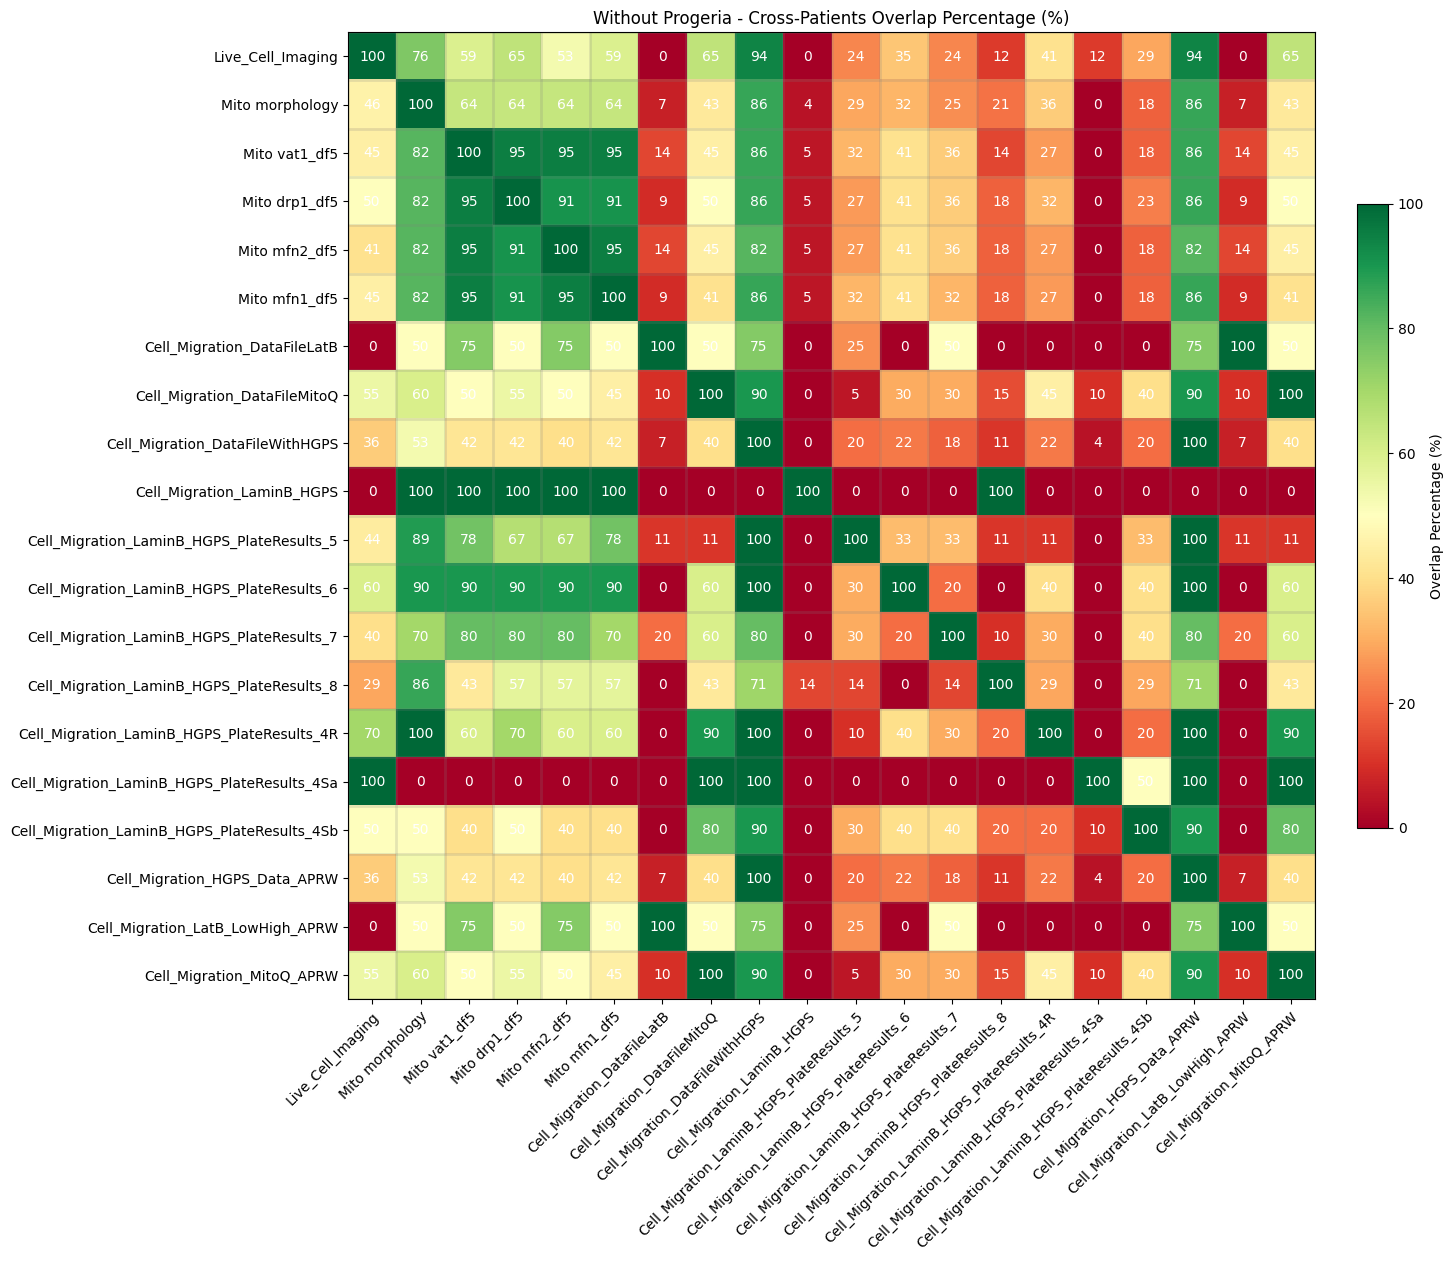

In [9]:
wells_collector.display_cross_patients_No_Progeria()

In [10]:
wells_collector.save_table_as_excel(os.path.join(output_path,'report'))

In [11]:
wells_collector.save_table_as_markdown(os.path.join(output_path,'report'))

In [12]:
wells_collector.save_table_as_csv(os.path.join(output_path,'report'))